In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [ ]:

# Load the dataset
df = pd.read_csv("/content/predictive_maintenance.csv")

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df.isnull().values.any()

False

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [ ]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [ ]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']
cat_cols = ['Type', 'Failure type']
label = 'Machine failure'

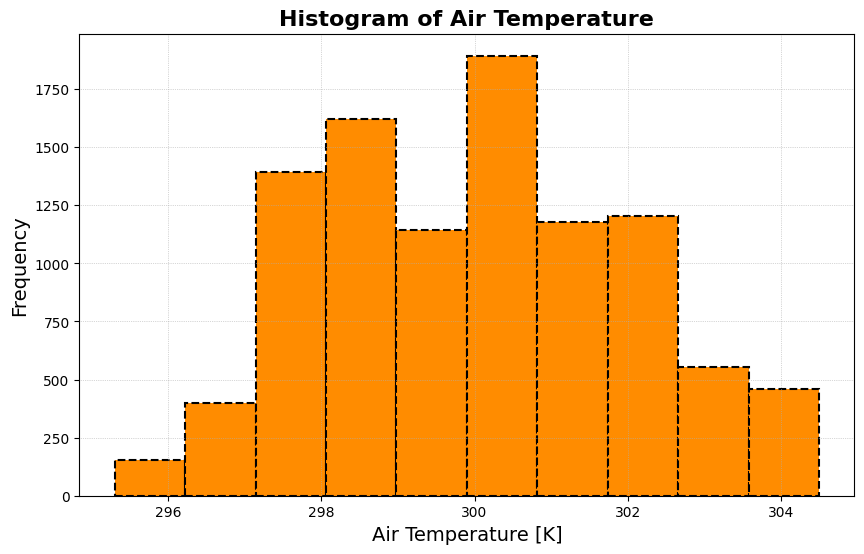

In [ ]:
import matplotlib.pyplot as plt

# 1. Histogram of Air Temperature
plt.figure(figsize=(10, 6))
plt.hist(df['Air temperature [K]'], bins=10, color='darkorange', edgecolor='black', linestyle='--', linewidth=1.5)
plt.title('Histogram of Air Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Air Temperature [K]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()


<ipython-input-5-f45575df6846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df[df['Failure Type'] != 'No Failure'], y="Failure Type", palette='coolwarm',


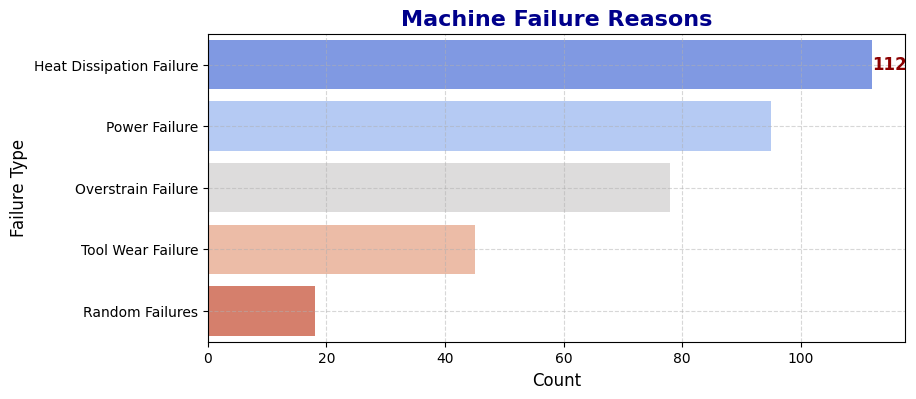

In [ ]:
plt.figure(figsize = (7, 3))
ax = sns.countplot(df[df['Failure Type'] != 'No Failure'], y = "Failure Type", palette = 'tab20', order=df[df['Failure Type'] != 'No Failure']['Failure Type'].value_counts().index)
plt.title("Machine Failure Reasons")
ax.bar_label(ax.containers[0])
plt.show()

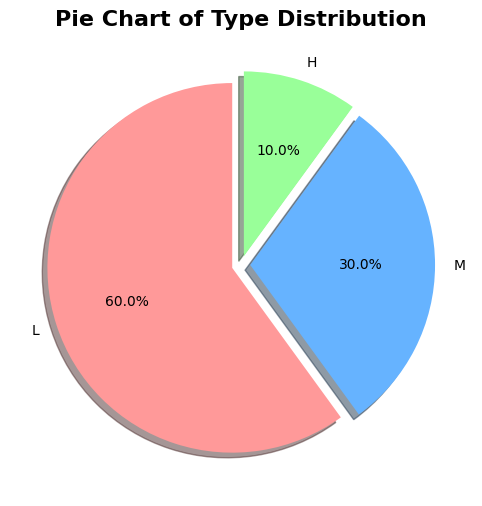

In [ ]:
import matplotlib.pyplot as plt

# 6. Pie Chart of Type Distribution
type_counts = df['Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        colors=['#FF9999', '#66B3FF', '#99FF99'],  # Using a soft color palette
        shadow=True,        # Adding shadow for a 3D effect
        startangle=90,      # Starting the pie chart from a different angle
        explode=(0.05, 0.05, 0.05))  # Slightly separating each slice for emphasis
plt.title('Pie Chart of Type Distribution', fontsize=16, fontweight='bold')
plt.show()


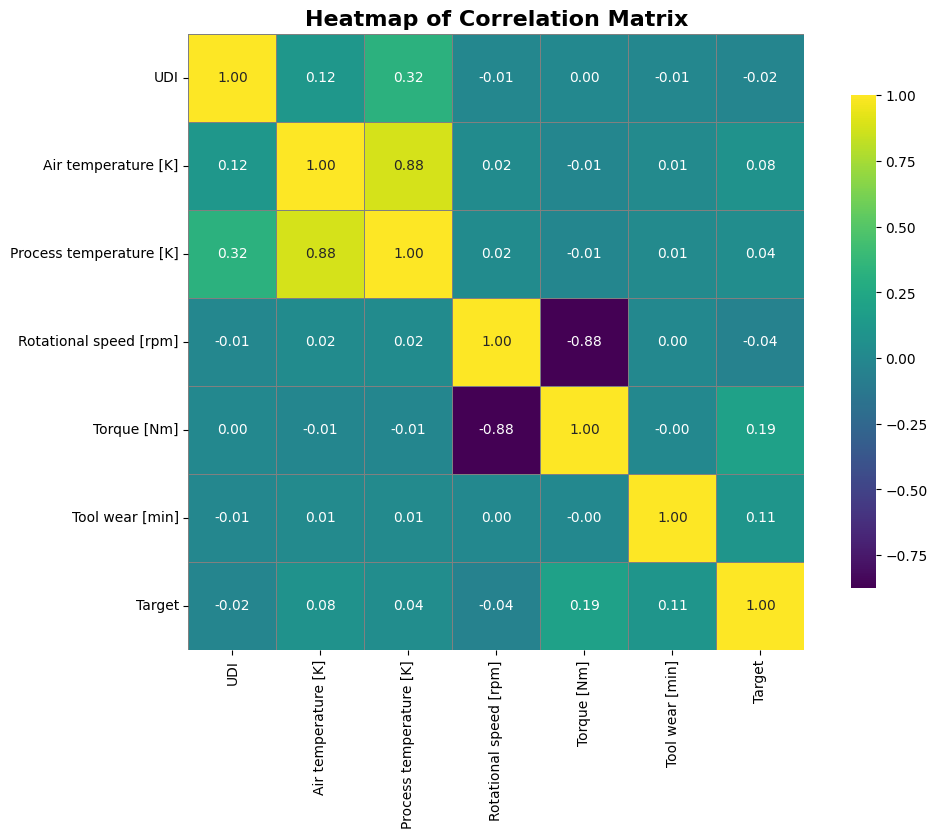

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# Exclude non-numeric columns for correlation matrix
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

# Create the heatmap with updated color and style
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5,
            linecolor='gray', fmt='.2f', square=True, cbar_kws={'shrink': .8})

plt.title('Heatmap of Correlation Matrix', fontsize=16, weight='bold')
plt.show()


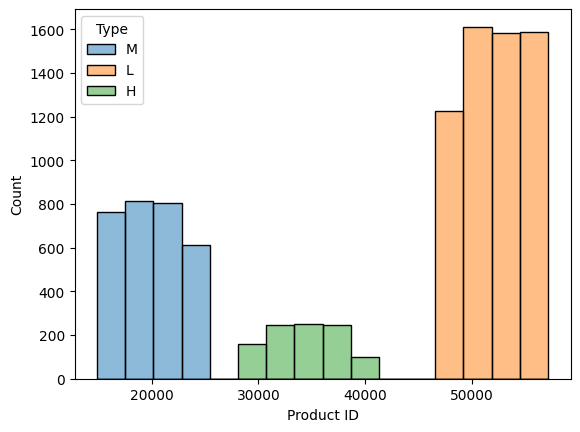

In [ ]:
# Remove first character and set to numeric dtype
df['Product ID'] = df['Product ID'].apply(lambda x: x[1:])
df['Product ID'] = pd.to_numeric(df['Product ID'])

# Histogram of ProductID
sns.histplot(data=df, x='Product ID', hue='Type')
plt.show()

In [ ]:

X = df.iloc[:,2:8] #Selecting ['Type', 'Air temperature [K], 'Process temperature [K]', ''Rotational Speed [rpm]', 'Torque [Nm] & 'Tool wear [min]' columns]
y = df.iloc[:,-1] #selecting the last column

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
y_train.shape


(8000,)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
ordinal_encoder.fit(X_train[['Type']])
X_train['Type'] = ordinal_encoder.transform(X_train[['Type']]).astype(int)
X_test['Type'] = ordinal_encoder.transform(X_test[['Type']]).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le = LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)

In [ ]:

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.92      0.73      0.81        15
           2       0.75      0.75      0.75        20
           3       0.88      0.54      0.67        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.59      0.50      0.54      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[1930    1    4    0    0    0]
 [   4   11    0    0    0    0]
 [   5    0   15    0    0    0]
 [   5    0    1    7    0    0]
 [  10    0    0    1    0    0]
 [   6    0    0    0    0    0]]


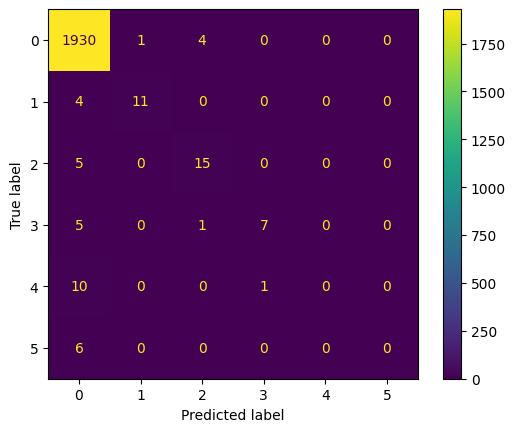

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1, 2, 3, 4, 5])

cm_display.plot(cmap='viridis', colorbar=True)
plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 98.22 %
Model Accuracy Score : 97.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.57      0.27      0.36        15
           2       0.83      0.75      0.79        20
           3       0.80      0.62      0.70        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.53      0.44      0.47      2000
weighted avg       0.97      0.98      0.97      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##SVM

In [ ]:

# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.58 %
Model Accuracy Score : 96.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        15
           2       0.75      0.15      0.25        20
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.29      0.19      0.21      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
